### 1. 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!

In [24]:
import sklearn
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

**(1) 데이터 가져오기**

*   sklearn.datasets의 load_diabetes에서 데이터를 가져와주세요.

In [26]:
diabetes = load_diabetes()

*   diabetes의 data를 df_X에, target을 df_y에 저장해주세요.

In [27]:
df_X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df_y = pd.DataFrame(diabetes.target, columns=['target'])

**(2) 모델에 입력할 데이터 X 준비하기**



*   df_X에 있는 값들을 numpy array로 변환해서 저장해주세요.



In [28]:
X = df_X.values

**(3) 모델에 예측할 데이터 y 준비하기**



*   df_y에 있는 값들을 numpy array로 변환해서 저장해주세요.



In [29]:
y = df_y['target'].values

**(4) train 데이터와 test 데이터로 분리하기**



*   X와 y 데이터를 각각 train 데이터와 test 데이터로 분리해주세요.



In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

**(5) 모델 준비하기**



*   입력 데이터 개수에 맞는 가중치 W와 b를 준비해주세요.



In [31]:
print(df_X.shape)
for i,feature_name in enumerate(diabetes.feature_names):
  print(f'{i+1} : {feature_name}')

(442, 10)
1 : age
2 : sex
3 : bmi
4 : bp
5 : s1
6 : s2
7 : s3
8 : s4
9 : s5
10 : s6


In [32]:
W = np.random.rand(10)
b = np.random.rand()



*   모델 함수를 구현해주세요.



In [33]:
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

**(6) 손실함수 loss 정의하기**



*   손실함수를 MSE 함수로 정의해주세요.



In [34]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()
    return mse

In [35]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

**(7) 기울기를 구하는 gradient 함수 구현하기**



*   기울기를 계산하는 gradient 함수를 구현해주세요.



In [36]:
def gradient(X, W, b, y):
    predictions = model(X, W, b)
    dW = 1/10 * 2 * X.T.dot(predictions - y)
    db = 2 * (predictions - y).mean()
    return dW, db

**(8) 하이퍼 파라미터인 학습률 설정하기**



*   학습률, learning rate 를 설정해주세요



In [37]:
LEARNING_RATE = 0.1



*   만약 학습이 잘 되지 않는다면 learning rate 값을 한번 여러 가지로 설정하며 실험해 보세요.



**(9) 모델 학습하기**



*   정의된 손실함수와 기울기 함수로 모델을 학습해주세요.



In [38]:
losses = []

for i in range(1, 5001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 4587.3750
Iteration 20 : Loss 3661.0089
Iteration 30 : Loss 3365.8002
Iteration 40 : Loss 3207.3006
Iteration 50 : Loss 3106.7806
Iteration 60 : Loss 3037.5440
Iteration 70 : Loss 2988.0052
Iteration 80 : Loss 2951.9171
Iteration 90 : Loss 2925.3673
Iteration 100 : Loss 2905.7028
Iteration 110 : Loss 2891.0568
Iteration 120 : Loss 2880.0920
Iteration 130 : Loss 2871.8406
Iteration 140 : Loss 2865.5982
Iteration 150 : Loss 2860.8493
Iteration 160 : Loss 2857.2150
Iteration 170 : Loss 2854.4159
Iteration 180 : Loss 2852.2449
Iteration 190 : Loss 2850.5484
Iteration 200 : Loss 2849.2115
Iteration 210 : Loss 2848.1485
Iteration 220 : Loss 2847.2949
Iteration 230 : Loss 2846.6022
Iteration 240 : Loss 2846.0336
Iteration 250 : Loss 2845.5612
Iteration 260 : Loss 2845.1638
Iteration 270 : Loss 2844.8252
Iteration 280 : Loss 2844.5328
Iteration 290 : Loss 2844.2772
Iteration 300 : Loss 2844.0507
Iteration 310 : Loss 2843.8477
Iteration 320 : Loss 2843.6635
Iteration 330 : L

Iteration 3360 : Loss 2826.0204
Iteration 3370 : Loss 2825.9867
Iteration 3380 : Loss 2825.9532
Iteration 3390 : Loss 2825.9197
Iteration 3400 : Loss 2825.8864
Iteration 3410 : Loss 2825.8531
Iteration 3420 : Loss 2825.8200
Iteration 3430 : Loss 2825.7869
Iteration 3440 : Loss 2825.7539
Iteration 3450 : Loss 2825.7210
Iteration 3460 : Loss 2825.6882
Iteration 3470 : Loss 2825.6555
Iteration 3480 : Loss 2825.6229
Iteration 3490 : Loss 2825.5904
Iteration 3500 : Loss 2825.5580
Iteration 3510 : Loss 2825.5257
Iteration 3520 : Loss 2825.4934
Iteration 3530 : Loss 2825.4613
Iteration 3540 : Loss 2825.4293
Iteration 3550 : Loss 2825.3973
Iteration 3560 : Loss 2825.3654
Iteration 3570 : Loss 2825.3337
Iteration 3580 : Loss 2825.3020
Iteration 3590 : Loss 2825.2704
Iteration 3600 : Loss 2825.2389
Iteration 3610 : Loss 2825.2075
Iteration 3620 : Loss 2825.1761
Iteration 3630 : Loss 2825.1449
Iteration 3640 : Loss 2825.1138
Iteration 3650 : Loss 2825.0827
Iteration 3660 : Loss 2825.0517
Iteratio



*   입력하는 데이터인 X에 들어가는 특성 컬럼들을 몇 개 빼도 괜찮습니다. 다양한 데이터로 실험해 보세요.



**(10) test 데이터에 대한 성능 확인하기**



*   test 데이터에 대한 성능을 확인해주세요.



In [39]:
predictions = model(X_test, W, b)
loss(X_test, W, b, y_test)

3082.2144301494595

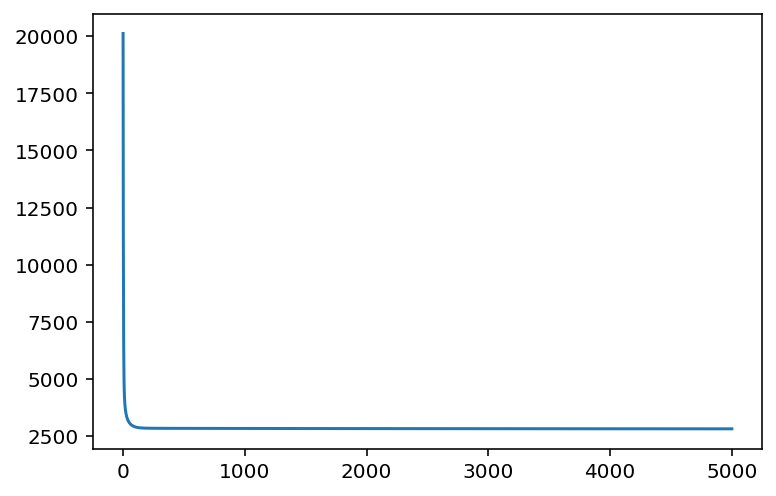

In [40]:
plt.plot(losses)
plt.show()

**(11) 정답 데이터와 예측한 데이터 시각화하기**



*   x축에는 X 데이터의 첫 번째 컬럼을, y축에는 정답인 target 데이터를 넣어서 모델이 예측한 데이터를 시각화해 주세요.



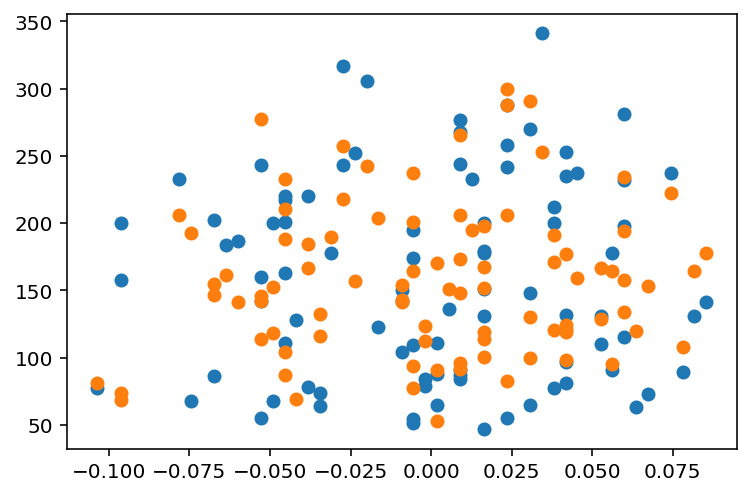

In [41]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], predictions)
plt.show()



---



### 2. 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?

In [42]:
import seaborn as sns
from sklearn.linear_model import LinearRegression

**(1) 데이터 가져오기**



*   터미널에서 ~/data/data/bike-sharing-demand 경로에 train.csv 데이터를 train 변수로 가져 옵니다.

In [43]:
train = pd.read_csv('train.csv')
print(train.shape)
train.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


**(2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기**

In [44]:
train['datetime'] = pd.to_datetime(train['datetime'])

train['year'] = train['datetime'].dt.year # 연도 정보
train['month'] = train['datetime'].dt.month # 월 정보
train['day'] = train['datetime'].dt.day # 일 정보
train['hour'] = train['datetime'].dt.hour # 시간 정보
train['minute'] = train['datetime'].dt.minute # 분 정보
train['second'] = train['datetime'].dt.second # 초 정보

**(3) year, month, day, hour, minute, second 데이터 개수 시각화하기**



*   sns.countplot 활용해서 시각화하기





*   subplot을 활용해서 한 번에 6개의 그래프 함께 시각화하기



<AxesSubplot:xlabel='second', ylabel='count'>

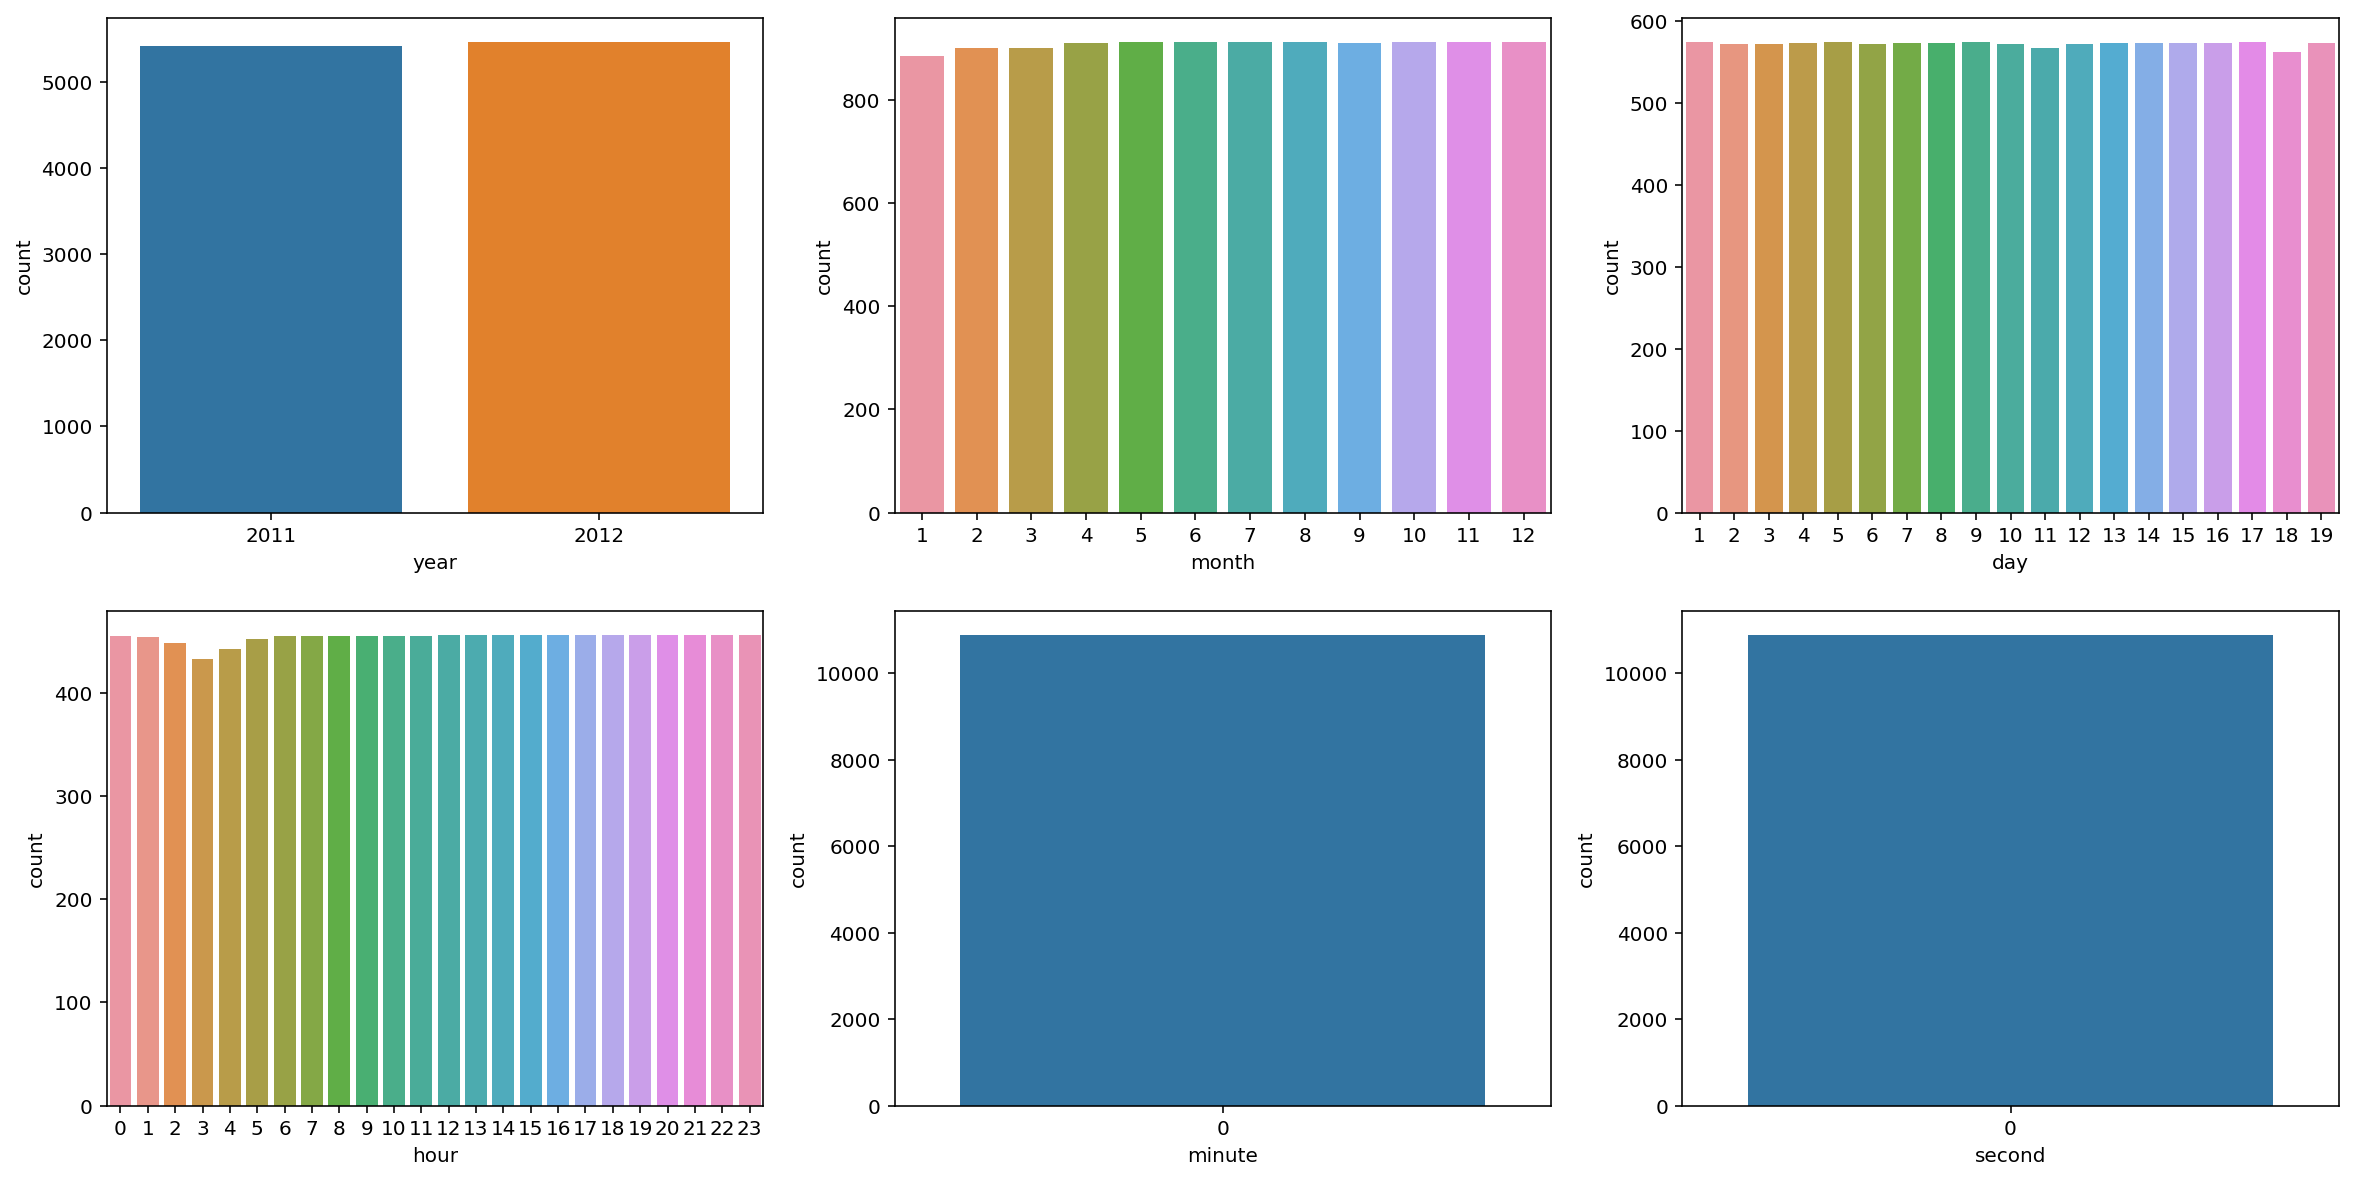

In [45]:
fig, ax = plt.subplots(2, 3, figsize=(20,10))

sns.countplot(x="year", data=train, ax = ax[0][0])
sns.countplot(x="month", data=train, ax = ax[0][1])
sns.countplot(x="day", data=train, ax = ax[0][2])
sns.countplot(x="hour", data=train, ax = ax[1][0])
sns.countplot(x="minute", data=train, ax = ax[1][1])
sns.countplot(x="second", data=train, ax = ax[1][2])

**(4) X, y 컬럼 선택 및 train/test 데이터 분리**



*   X에는 문자열 데이터, 쓸모없는 데이터를 제외한 컬럼의 데이터 넣기



In [46]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second'],
      dtype='object')

In [47]:
X = train[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'year', 'month', 'day', 'hour']].values
X

array([[ 1.,  0.,  0., ...,  1.,  1.,  0.],
       [ 1.,  0.,  0., ...,  1.,  1.,  1.],
       [ 1.,  0.,  0., ...,  1.,  1.,  2.],
       ...,
       [ 4.,  0.,  1., ..., 12., 19., 21.],
       [ 4.,  0.,  1., ..., 12., 19., 22.],
       [ 4.,  0.,  1., ..., 12., 19., 23.]])



*   count 값을 맞추고자 하므로, y 변수에 count 컬럼의 데이터 넣기



In [48]:
y = train['count'].values
y

array([ 16,  40,  32, ..., 168, 129,  88], dtype=int64)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

**(5) LinearRegression 모델 학습**



*   sklearn의 LinearRegression 모델 불러오기 및 학습하기



In [50]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

**(6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산**



*   학습된 모델에 X_test를 입력해서 예측값 출력하기



In [51]:
predictions = model.predict(X_test)
predictions

array([127.,  73., 190., ..., 151., 130., 126.])



*   모델이 예측한 값과 정답 target 간의 손실함수 값 계산하기





*   mse 값과 함께 rmse 값도 계산하기



In [52]:
mse = ((predictions - y_test) ** 2).mean()
mse

8.763366014049542e-25

In [53]:
rmse = mse ** 0.5
rmse

9.361285175684768e-13

**(7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기**



*   x축에 X 데이터 중 temp 데이터를, y축에는 count 데이터를 넣어서 시각화하기



In [54]:
df_X_test = pd.DataFrame(X_test, columns=['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'year', 'month', 'day', 'hour'])
df_X_test['predicted'] = predictions
df_X_test['actual'] = y_test

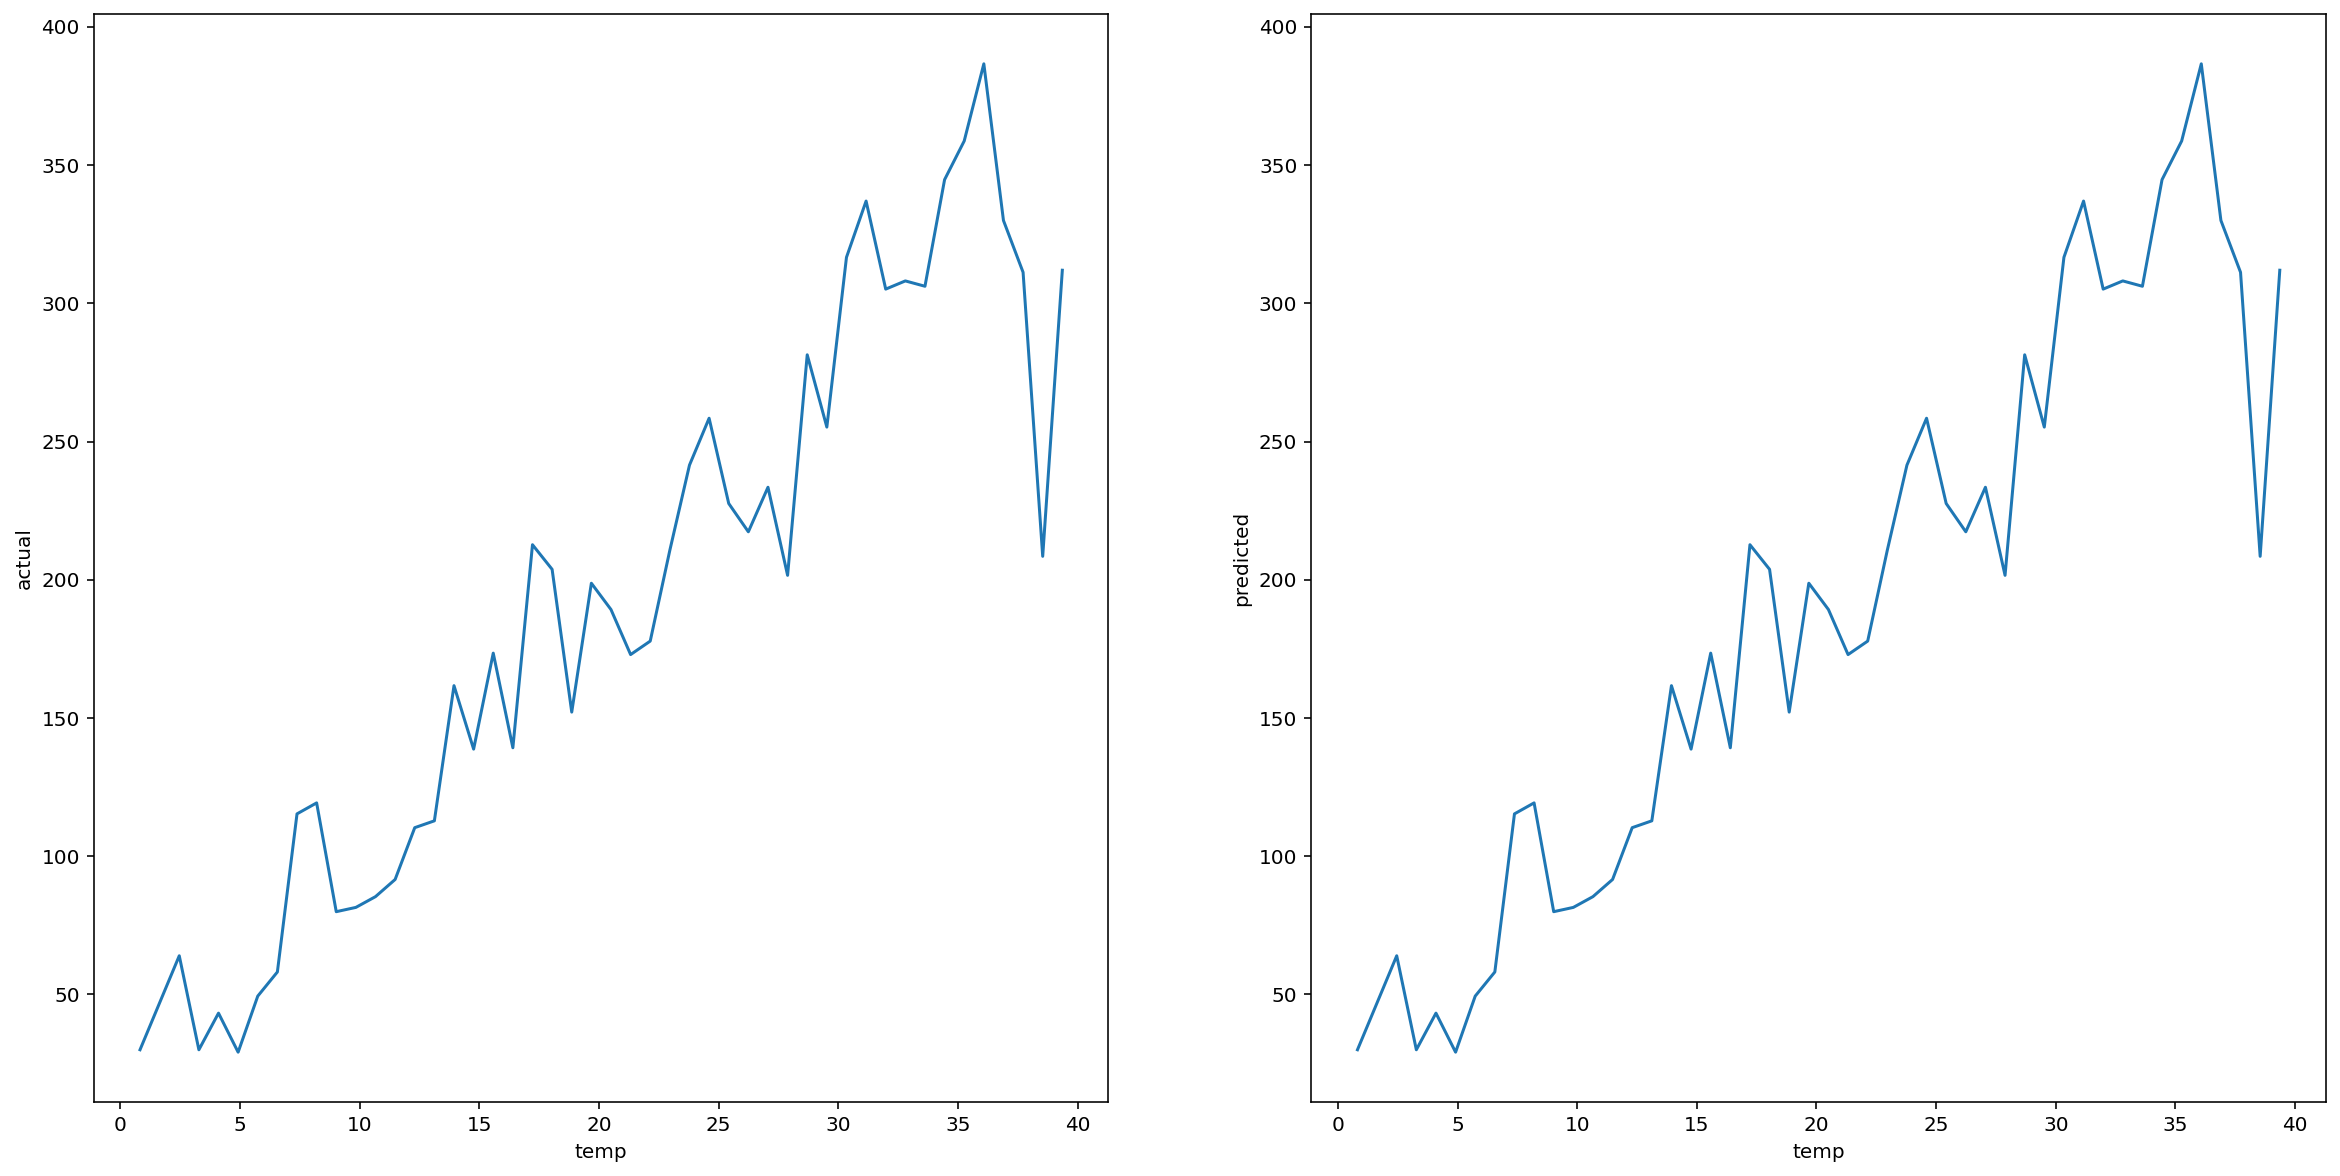

In [55]:
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
sns.lineplot(x=df_X_test['temp'], y=df_X_test['actual'], ci=None)

plt.subplot(1,2,2)
sns.lineplot(x=df_X_test['temp'], y=df_X_test['predicted'], ci=None)

plt.show()



*   x축에 X 데이터 중 humidity 데이터를, y축에는 count 데이터를 넣어서 시각화하기



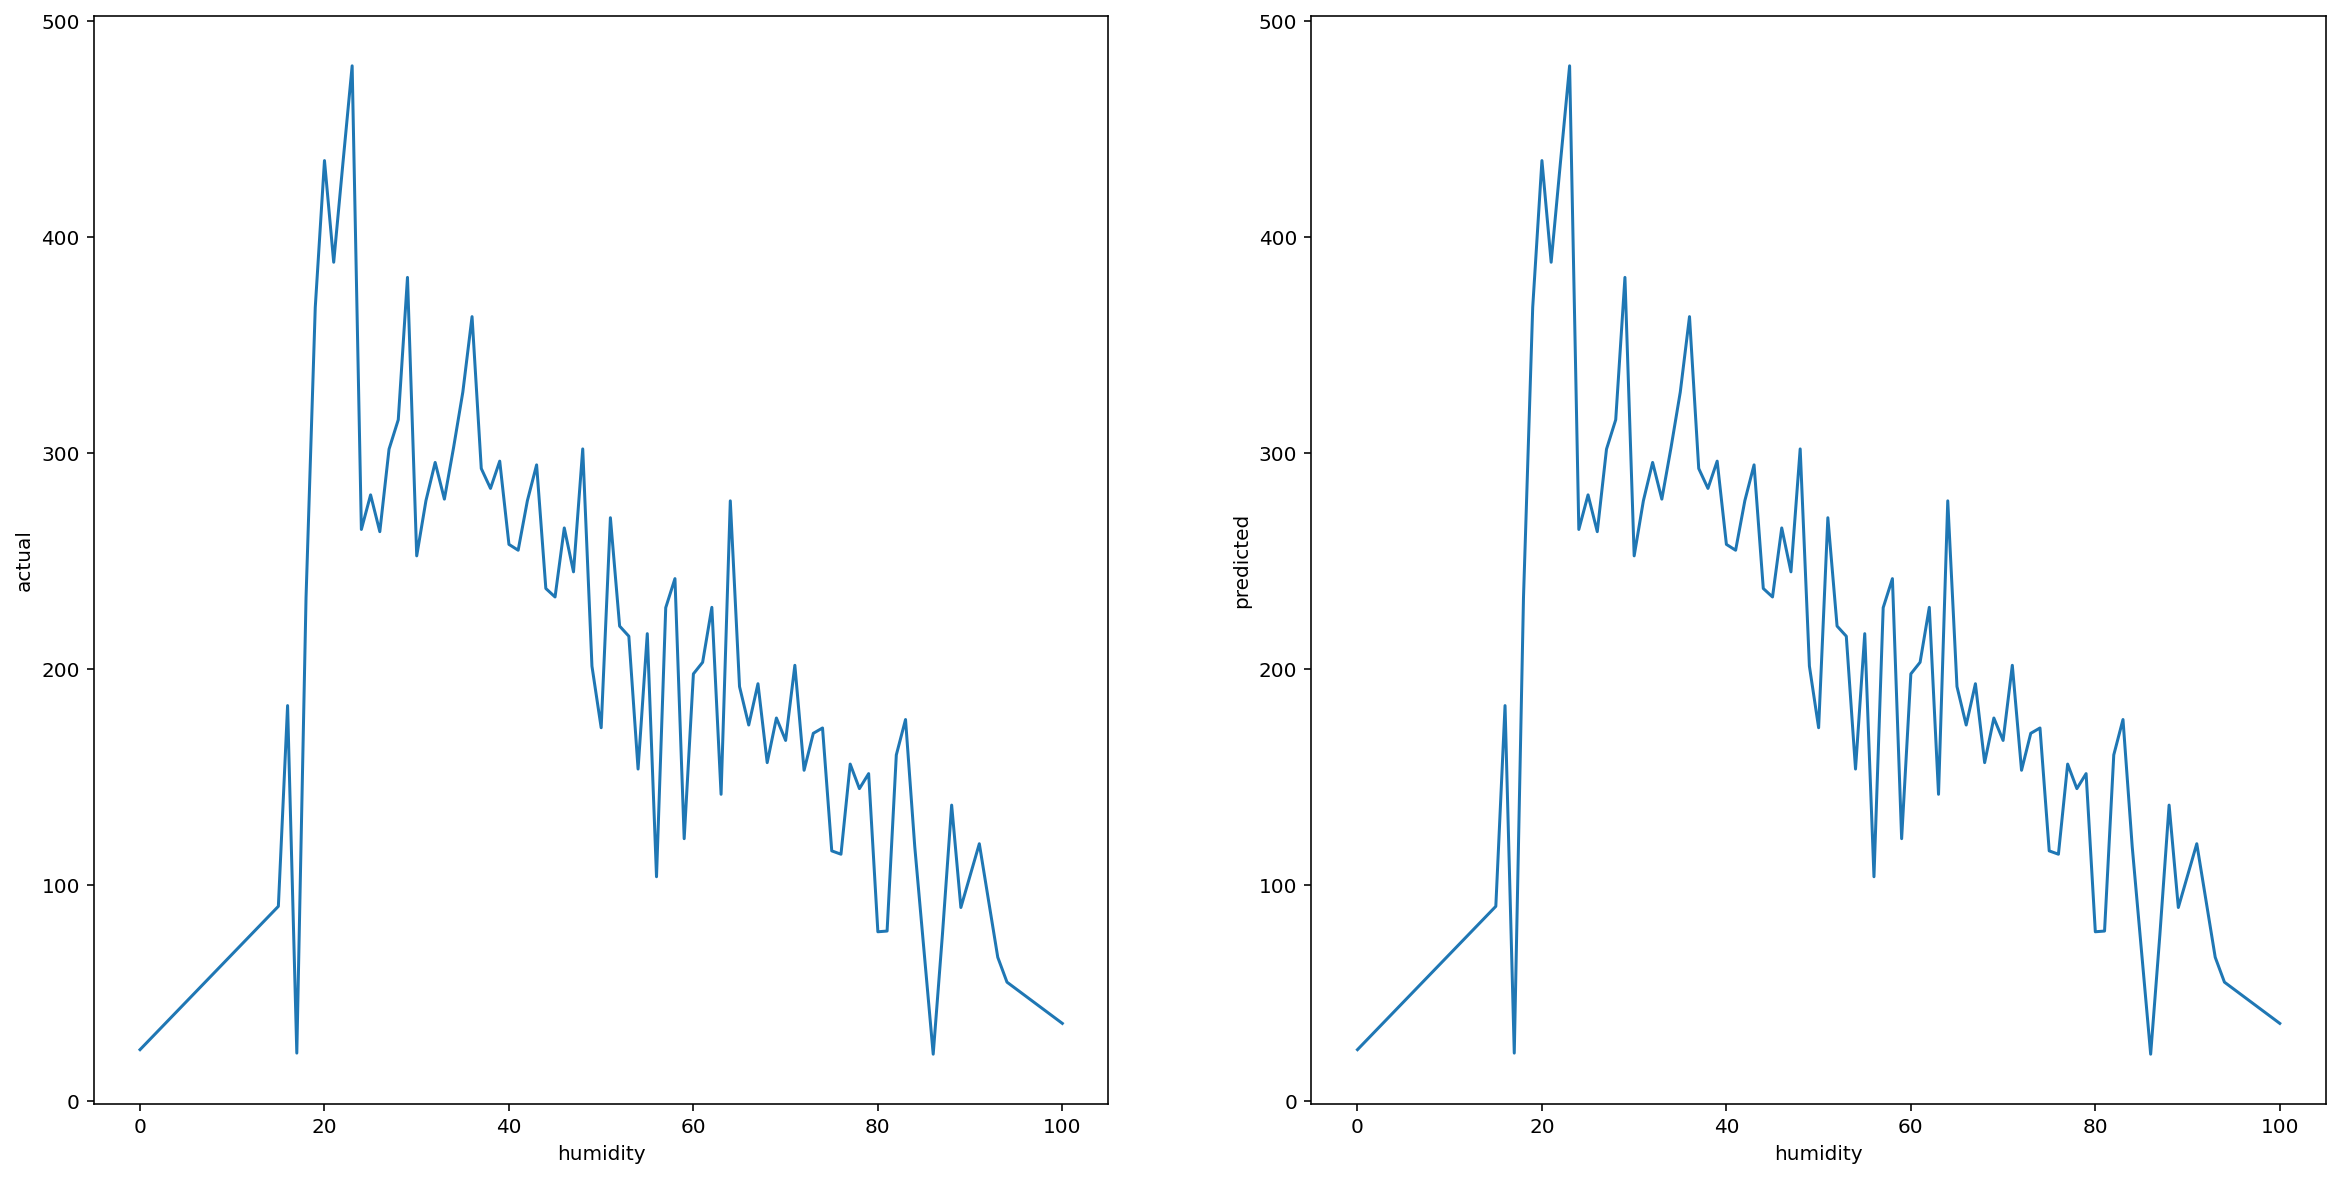

In [56]:
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
sns.lineplot(x=df_X_test['humidity'], y=df_X_test['actual'], ci=None)

plt.subplot(1,2,2)
sns.lineplot(x=df_X_test['humidity'], y=df_X_test['predicted'], ci=None)

plt.show()



---



### 3. 회고

본 노드에서 학습한 내용을 한 단어로 요약한다면 '**EDA(Explotary Data Analysis)**'라고 할 수 있을 것이다.

*numpy, pandas, matplotlib, seaborn* 등의 다양한 도구들을 활용해 데이터를 다각도에서 분석하고 이를 시각화하는 방법을 배울 수 있었다.

그러나 아직 이러한 도구들을 활용하는 것이 익숙하지 않음을 많이 느꼈고, 특히 예측 결과를 시각화하는 부분에서 실제 값과 예측 값을 단일 plot에 나타내고자 했으나 끝내 구현하지 못한 점은 아쉬움으로 남는다.

앞으로 진행될 노드에서 이들을 좀 더 적극적으로 활용할 것이다.